## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# DATA PREPARATION

### Importing Python libraries commonly used for data manipulation, numerical computations, and data visualization. We will be using then with our data set

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
import sqlite3
from scipy import stats

### Importing the  1st csv file using pandas inorder to enable looking into the data

In [74]:
df= pd.read_csv('data/bom.movie_gross.csv')
df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Importing the  2nd csv file using pandas inorder to enable looking into the data

In [3]:
df_1 = pd.read_csv('data/tmdb.movies.csv')
df_1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### Importing the  3rd csv file using pandas inorder to enable looking into the data

In [4]:
df_2= pd.read_csv('data/tn.movie_budgets.csv')
df_2


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Looking into the Sqlite database inorder to enable looking into the data

In [5]:
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [6]:
df_3 = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id) 
JOIN writers
USING(movie_id) 
""",conn)
print(df_3)

         movie_id               primary_title              original_title  \
0       tt0063540                   Sunghursh                   Sunghursh   
1       tt0063540                   Sunghursh                   Sunghursh   
2       tt0063540                   Sunghursh                   Sunghursh   
3       tt0063540                   Sunghursh                   Sunghursh   
4       tt0069049  The Other Side of the Wind  The Other Side of the Wind   
...           ...                         ...                         ...   
169298  tt9914286           Sokagin Çocuklari           Sokagin Çocuklari   
169299  tt9914642                   Albatross                   Albatross   
169300  tt9914642                   Albatross                   Albatross   
169301  tt9914942  La vida sense la Sara Amat  La vida sense la Sara Amat   
169302  tt9914942  La vida sense la Sara Amat  La vida sense la Sara Amat   

        start_year  runtime_minutes              genres  averagerating  \
0

In [7]:
df_3

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0347899
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm1194313
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm1391276
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000080
...,...,...,...,...,...,...,...,...,...
169298,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,nm4394529
169299,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859
169300,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm7332227
169301,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm3678448


In [8]:
df_temp = pd.read_sql("""
SELECT DISTINCT movie_id, region, language, primary_name, death_year
FROM movie_basics
JOIN directors
USING(movie_id) 
JOIN persons
USING (person_id)
JOIN movie_akas
USING(movie_id)
""",conn)
print(df_temp)

         movie_id region language         primary_name  death_year
0       tt0063540   None     None  Harnam Singh Rawail      2004.0
1       tt0063540     IN     None  Harnam Singh Rawail      2004.0
2       tt0063540     IN       hi  Harnam Singh Rawail      2004.0
3       tt0066787   None     None            Mani Kaul      2011.0
4       tt0066787     IN     None            Mani Kaul      2011.0
...           ...    ...      ...                  ...         ...
352470  tt9915436   None     None    Eduardo Rajabally         NaN
352471  tt9915436     US     None    Eduardo Rajabally         NaN
352472  tt9916170   None     None      Tamar Guimaraes         NaN
352473  tt9916170     BR     None      Tamar Guimaraes         NaN
352474  tt9916170    XWW       en      Tamar Guimaraes         NaN

[352475 rows x 5 columns]


In [9]:
df_temp2 = pd.read_sql("""
SELECT DISTINCT movie_id, primary_name as writer
FROM movie_basics
JOIN writers
USING(movie_id) 
JOIN persons
USING (person_id)
""",conn)
print(df_temp2)

         movie_id                  writer
0       tt0063540              Abrar Alvi
1       tt0063540                  Gulzar
2       tt0063540          Mahasweta Devi
3       tt0063540           Anjana Rawail
4       tt0069049            Orson Welles
...           ...                     ...
178103  tt9916622   Ana Célia de Oliveira
178104  tt9916706        Dr. Sudhir Nikam
178105  tt9916730            Kiran Gawade
178106  tt9916754  Vinicius Augusto Bozzo
178107  tt9916754           Angela Gurgel

[178108 rows x 2 columns]


In [10]:
df_temp = df_temp.merge(df_temp2, how='left', on='movie_id')

In [11]:
df_temp

,movie_id,region,language,primary_name,death_year,writer
0,tt0063540,None,None,Harnam Singh Rawail,2004.0,Abrar Alvi
1,tt0063540,None,None,Harnam Singh Rawail,2004.0,Gulzar
2,tt0063540,None,None,Harnam Singh Rawail,2004.0,Mahasweta Devi
3,tt0063540,None,None,Harnam Singh Rawail,2004.0,Anjana Rawail
4,tt0063540,IN,None,Harnam Singh Rawail,2004.0,Abrar Alvi
...,...,...,...,...,...,...
768307,tt9916170,BR,None,Tamar Guimaraes,NaN,Tamar Guimaraes
768308,tt9916170,BR,None,Tamar Guimaraes,NaN,Lillah Halla
768309,tt9916170,XWW,en,Tamar Guimaraes,NaN,Melissa de Raaf
768310,tt9916170,XWW,en,Tamar Guimaraes,NaN,Tamar Guimaraes


In [12]:
df_3 = df_3.merge(df_temp, how= 'inner', on='movie_id')

In [13]:
#df_10

In [14]:
df_3

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,region,language,primary_name,death_year,writer
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,Harnam Singh Rawail,2004.0,Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,Harnam Singh Rawail,2004.0,Gulzar
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,Harnam Singh Rawail,2004.0,Mahasweta Devi
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,Harnam Singh Rawail,2004.0,Anjana Rawail
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,IN,None,Harnam Singh Rawail,2004.0,Abrar Alvi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75629116,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,None,Vineesh Aaradya,NaN,Anooja Kozhikode
75629117,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,None,Vineesh Aaradya,NaN,Thankayam Sasikumar
75629118,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,ml,Vineesh Aaradya,NaN,Vineesh Aaradya
75629119,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,ml,Vineesh Aaradya,NaN,Anooja Kozhikode


In [15]:
df_3.duplicated().sum()

71745438

In [16]:
df_3.drop_duplicates(inplace=True)

### Joining the dataframes 

In [75]:
joined_data = df_3.copy()

In [76]:
joined_data.merge(df_1, how = 'left', left_on = 'primary_title', right_on = 'title')
joined_data = joined_data.merge(df_1, how='left', left_on='primary_title', right_on='title')


In [77]:
joined_data

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,region,...,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059853,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4059854,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4059855,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4059856,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [79]:
df_2['production_budget'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Name: production_budget, Length: 5782, dtype: bool

In [80]:
joined_data = joined_data.merge(df_2, how='left', left_on='primary_title', right_on='movie')


In [81]:
joined_data

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,region,...,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087842,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087843,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087844,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087845,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df = df.set_index('title')
df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [83]:
joined_data =joined_data.set_index('primary_title')
joined_data

,movie_id,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,region,language,...,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
primary_title,,,,,,,,,,,,,,,,,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,IN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Padmavyuhathile Abhimanyu,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Padmavyuhathile Abhimanyu,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Padmavyuhathile Abhimanyu,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
joined_data = joined_data.combine_first(df)

In [85]:
joined_data =joined_data.reset_index()
joined_data =joined_data.rename(columns ={'index':'primary_title'})
joined_data


,primary_title,Unnamed: 0,averagerating,death_year,domestic_gross,foreign_gross,genre_ids,genres,id_x,id_y,...,release_date_y,runtime_minutes,start_year,studio,title,vote_average,vote_count,worldwide_gross,writer,year
0,#1 Serial Killer,NaN,5.6,NaN,NaN,NaN,NaN,Horror,NaN,NaN,...,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
1,#1 Serial Killer,NaN,5.6,NaN,NaN,NaN,NaN,Horror,NaN,NaN,...,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
2,#5,NaN,6.8,NaN,NaN,NaN,NaN,"Biography,Comedy,Fantasy",NaN,NaN,...,NaN,68.0,2013.0,NaN,NaN,NaN,NaN,NaN,Ricky Bardy,NaN
3,#66,NaN,5.3,NaN,NaN,NaN,NaN,Action,NaN,NaN,...,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,NaN,Asun Mawardi,NaN
4,#66,NaN,5.3,NaN,NaN,NaN,NaN,Action,NaN,NaN,...,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,NaN,Matthew Ryan Fischer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088706,ärtico,NaN,6.6,NaN,NaN,NaN,NaN,Drama,NaN,NaN,...,NaN,78.0,2014.0,NaN,NaN,NaN,NaN,NaN,Carlos Unamuno,NaN
4088707,Šiška Deluxe,NaN,6.3,NaN,NaN,NaN,NaN,"Comedy,Drama",NaN,NaN,...,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088708,Šiška Deluxe,NaN,6.3,NaN,NaN,NaN,NaN,"Comedy,Drama",NaN,NaN,...,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088709,Šiška Deluxe,NaN,6.3,NaN,NaN,NaN,NaN,"Comedy,Drama",NaN,NaN,...,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN


In [86]:
joined_data[joined_data['primary_title']=='Toy Story 3']

,primary_title,Unnamed: 0,averagerating,death_year,domestic_gross,foreign_gross,genre_ids,genres,id_x,id_y,...,release_date_y,runtime_minutes,start_year,studio,title,vote_average,vote_count,worldwide_gross,writer,year
3581047,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Andrew Stanton,2010.0
3581048,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",John Lasseter,2010.0
3581049,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Lee Unkrich,2010.0
3581050,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Michael Arndt,2010.0
3581051,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Andrew Stanton,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581586,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Michael Arndt,2010.0
3581587,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Andrew Stanton,2010.0
3581588,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",John Lasseter,2010.0
3581589,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Lee Unkrich,2010.0


In [87]:
columns_to_clean = ['domestic_gross', 'foreign_gross', 'worldwide_gross', 'production_budget']
for col in columns_to_clean:
    joined_data[col] = (
        joined_data[col]
        .replace('[\$,]', '', regex=True)  
        .astype(float)  
    )

In [88]:
joined_data.shape

(4088711, 33)

In [89]:
joined_data.columns


Index(['primary_title', 'Unnamed: 0', 'averagerating', 'death_year',
       'domestic_gross', 'foreign_gross', 'genre_ids', 'genres', 'id_x',
       'id_y', 'language', 'movie', 'movie_id', 'numvotes',
       'original_language', 'original_title_x', 'original_title_y',
       'person_id', 'popularity', 'primary_name', 'production_budget',
       'region', 'release_date_x', 'release_date_y', 'runtime_minutes',
       'start_year', 'studio', 'title', 'vote_average', 'vote_count',
       'worldwide_gross', 'writer', 'year'],
      dtype='object')

### Columns to be dropped

In [90]:
columns_to_drop = ['id_x','id_y','original_title_y','original_title_x','release_date_y','genre_ids','title','movie','Unnamed: 0']
joined_data.drop(columns=columns_to_drop, inplace=True)


In [91]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088711 entries, 0 to 4088710
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   primary_title      object 
 1   averagerating      float64
 2   death_year         float64
 3   domestic_gross     float64
 4   foreign_gross      float64
 5   genres             object 
 6   language           object 
 7   movie_id           object 
 8   numvotes           float64
 9   original_language  object 
 10  person_id          object 
 11  popularity         float64
 12  primary_name       object 
 13  production_budget  float64
 14  region             object 
 15  release_date_x     object 
 16  runtime_minutes    float64
 17  start_year         float64
 18  studio             object 
 19  vote_average       float64
 20  vote_count         float64
 21  worldwide_gross    float64
 22  writer             object 
 23  year               float64
dtypes: float64(13), object(11)
memory usage: 748.7+ MB

# DATA CLEANING

### The percentage of missing values in the dataframe

In [92]:
missing_percentage =joined_data.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.020936
death_year           99.387973
domestic_gross       74.563695
foreign_gross        82.676765
genres                0.155208
language             87.365040
movie_id              0.020936
numvotes              0.020936
original_language    44.331526
person_id             0.020936
popularity           44.331526
primary_name          0.020936
production_budget    80.674961
region               12.687911
release_date_x       44.331526
runtime_minutes       2.802228
start_year            0.020936
studio               78.650851
vote_average         44.331526
vote_count           44.331526
worldwide_gross      80.674961
writer                0.020936
year                 78.649775
dtype: float64

### Viewing the columns with the most missing values

In [93]:
columns_high_missing = missing_percentage[missing_percentage > 50]
print(columns_high_missing)

death_year           99.387973
domestic_gross       74.563695
foreign_gross        82.676765
language             87.365040
production_budget    80.674961
studio               78.650851
worldwide_gross      80.674961
year                 78.649775
dtype: float64


### Finding the duplicate in the data set

In [94]:
joined_data.duplicated().sum()

82779

Dropping duplicated values in the dataset

In [95]:
#checking if we have duplicated values in our dataset
joined_data.drop_duplicates(inplace=True)

### Descriptive statistics for numerical columns in a DataFrame, including metrics like count, mean, standard deviation, minimum, maximum, and quartiles

In [96]:
joined_data.describe()

,averagerating,death_year,domestic_gross,foreign_gross,numvotes,popularity,production_budget,runtime_minutes,start_year,vote_average,vote_count,worldwide_gross,year
count,4.005076e+06,24855.000000,9.777310e+05,6.595690e+05,4.005076e+06,2.193344e+06,7.408050e+05,3.891492e+06,4.005076e+06,2.193344e+06,2.193344e+06,7.408050e+05,813120.000000
mean,5.954797e+00,2015.674552,8.881263e+07,1.701629e+08,3.799610e+04,8.942504e+00,7.408576e+07,1.073702e+02,2.014140e+03,5.589703e+00,1.227286e+03,2.911948e+08,2014.057614
std,1.117393e+00,3.006661,1.300629e+08,2.090250e+08,1.101587e+05,9.536654e+00,7.601173e+07,2.322829e+01,2.279250e+00,1.165272e+00,2.729816e+03,3.802712e+08,2.258931
min,1.000000e+00,1944.000000,0.000000e+00,6.000000e+02,5.000000e+00,6.000000e-01,1.400000e+03,4.000000e+00,2.010000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2010.000000
25%,5.200000e+00,2014.000000,2.400000e+06,2.360000e+07,8.900000e+01,2.262000e+00,1.000000e+07,9.200000e+01,2.012000e+03,4.800000e+00,1.400000e+01,3.116475e+07,2013.000000
50%,5.900000e+00,2016.000000,2.606896e+07,5.260000e+07,7.010000e+02,7.571000e+00,4.000000e+07,1.010000e+02,2.014000e+03,5.200000e+00,1.480000e+02,1.119463e+08,2014.000000
75%,6.800000e+00,2018.000000,1.234776e+08,2.897000e+08,1.072900e+04,1.208000e+01,1.350000e+08,1.250000e+02,2.016000e+03,6.500000e+00,1.104000e+03,4.577294e+08,2016.000000
max,1.000000e+01,2019.000000,9.367000e+08,9.605000e+08,1.841066e+06,8.077300e+01,4.250000e+08,1.440000e+03,2.019000e+03,1.000000e+01,2.218600e+04,2.776345e+09,2018.000000


### ### Descriptive statistics for categorical columns in a DataFrame, including metrics like count, unique, to and freq

In [97]:
joined_data.describe(include= ['object'])

,primary_title,genres,language,movie_id,original_language,person_id,primary_name,region,release_date_x,studio,writer
count,4005932,3999586,505472,4005076,2193344,4005076,4005076,3493324,2193344,813076,4005076
unique,57823,889,75,60054,67,73278,47312,190,2819,257,72561
top,ABCs of Death 2,"Comedy,Horror",en,tt2926810,en,nm0863807,James Gunn,US,2014-10-02,Rela.,Ant Timpson
freq,303831,475158,225660,303831,1935195,15687,21443,814065,303871,144955,15687


# HANDLING MISSING VALUES ON CONTINOUS DATA

### Filling in the missing values of the continuos data with the median 

#### Confirmantion that the continous data has been filled by the median

In [98]:
missing_percentage =joined_data.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.021368
death_year           99.379545
domestic_gross       75.592921
foreign_gross        83.535192
genres                0.158415
language             87.381913
movie_id              0.021368
numvotes              0.021368
original_language    45.247598
person_id             0.021368
popularity           45.247598
primary_name          0.021368
production_budget    81.507300
region               12.796223
release_date_x       45.247598
runtime_minutes       2.856763
start_year            0.021368
studio               79.703200
vote_average         45.247598
vote_count           45.247598
worldwide_gross      81.507300
writer                0.021368
year                 79.702102
dtype: float64

In [99]:
# Calculate the correlation matrix
correlation_matrix = joined_data.corr()

### The plot of the continous data shows the correlation between each variable with the other

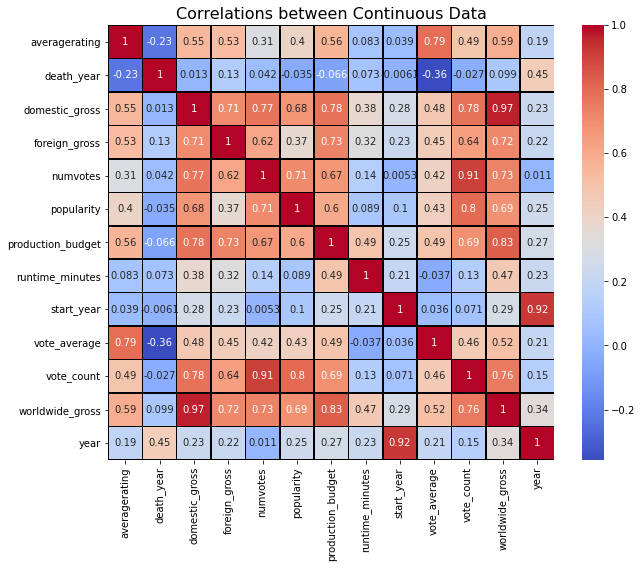

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlations between Continuous Data', fontsize=16)
plt.show()

# HANDLING MISSING VALUES ON CATEGORICAL DATA

### Filling in categorical data is important in data analysis since it improves the model performance,information preservation,data integrity and consistability and Improved visualization

### Confirmation that the missing categorical data has been filled in

In [101]:
missing_percentage =joined_data.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.021368
death_year           99.379545
domestic_gross       75.592921
foreign_gross        83.535192
genres                0.158415
language             87.381913
movie_id              0.021368
numvotes              0.021368
original_language    45.247598
person_id             0.021368
popularity           45.247598
primary_name          0.021368
production_budget    81.507300
region               12.796223
release_date_x       45.247598
runtime_minutes       2.856763
start_year            0.021368
studio               79.703200
vote_average         45.247598
vote_count           45.247598
worldwide_gross      81.507300
writer                0.021368
year                 79.702102
dtype: float64

Quick clean

In [102]:
missing_percentage =joined_data.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.021368
death_year           99.379545
domestic_gross       75.592921
foreign_gross        83.535192
genres                0.158415
language             87.381913
movie_id              0.021368
numvotes              0.021368
original_language    45.247598
person_id             0.021368
popularity           45.247598
primary_name          0.021368
production_budget    81.507300
region               12.796223
release_date_x       45.247598
runtime_minutes       2.856763
start_year            0.021368
studio               79.703200
vote_average         45.247598
vote_count           45.247598
worldwide_gross      81.507300
writer                0.021368
year                 79.702102
dtype: float64

In [103]:
joined_data.duplicated().sum()

0

In [104]:
joined_data.drop_duplicates(inplace=True)

In [105]:
joined_data

,primary_title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date_x,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
0,#1 Serial Killer,5.6,NaN,NaN,NaN,Horror,None,tt2346170,40.0,NaN,...,None,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
1,#1 Serial Killer,5.6,NaN,NaN,NaN,Horror,None,tt2346170,40.0,NaN,...,US,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
2,#5,6.8,NaN,NaN,NaN,"Biography,Comedy,Fantasy",None,tt3120962,6.0,NaN,...,US,NaN,68.0,2013.0,NaN,NaN,NaN,NaN,Ricky Bardy,NaN
3,#66,5.3,NaN,NaN,NaN,Action,None,tt5255986,18.0,NaN,...,ID,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,Asun Mawardi,NaN
4,#66,5.3,NaN,NaN,NaN,Action,None,tt5255986,18.0,NaN,...,ID,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,Matthew Ryan Fischer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088706,ärtico,6.6,NaN,NaN,NaN,Drama,None,tt3509772,101.0,NaN,...,SE,NaN,78.0,2014.0,NaN,NaN,NaN,NaN,Carlos Unamuno,NaN
4088707,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,None,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088708,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,RS,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088709,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,SI,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN


In [106]:
df_cleaned = joined_data.copy()
df_cleaned.dropna(subset=['foreign_gross', 'domestic_gross', 'worldwide_gross'], inplace=True)

In [107]:
df_cleaned

,primary_title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date_x,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
22262,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,None,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22263,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,None,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
22264,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,None,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Damien Chazelle,2016.0
22265,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,AR,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22266,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,AR,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085517,Zootopia,8.0,NaN,341268248.0,682500000.0,"Adventure,Animation,Comedy",None,tt2948356,383446.0,en,...,VN,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Kellie D. Lewis,2016.0
4085518,Zootopia,8.0,NaN,341268248.0,682500000.0,"Adventure,Animation,Comedy",None,tt2948356,383446.0,en,...,VN,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jared Bush,2016.0
4085519,Zootopia,8.0,NaN,341268248.0,682500000.0,"Adventure,Animation,Comedy",None,tt2948356,383446.0,en,...,VN,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jennifer Lee,2016.0
4085520,Zootopia,8.0,NaN,341268248.0,682500000.0,"Adventure,Animation,Comedy",None,tt2948356,383446.0,en,...,VN,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Phil Johnston,2016.0


In [108]:
missing_percentage =df_cleaned.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.000000
death_year           99.796583
domestic_gross        0.000000
foreign_gross         0.000000
genres                0.001626
language             83.665045
movie_id              0.000000
numvotes              0.000000
original_language     0.218050
person_id             0.000000
popularity            0.218050
primary_name          0.000000
production_budget     0.000000
region                3.788685
release_date_x        0.218050
runtime_minutes       0.061964
start_year            0.000000
studio                0.000000
vote_average          0.218050
vote_count            0.218050
worldwide_gross       0.000000
writer                0.000000
year                  0.000000
dtype: float64

In [109]:
df_cleaned['death_year'].fillna(-1, inplace=True)

In [110]:
df_cleaned.isnull().mean() * 100

primary_title         0.000000
averagerating         0.000000
death_year            0.000000
domestic_gross        0.000000
foreign_gross         0.000000
genres                0.001626
language             83.665045
movie_id              0.000000
numvotes              0.000000
original_language     0.218050
person_id             0.000000
popularity            0.218050
primary_name          0.000000
production_budget     0.000000
region                3.788685
release_date_x        0.218050
runtime_minutes       0.061964
start_year            0.000000
studio                0.000000
vote_average          0.218050
vote_count            0.218050
worldwide_gross       0.000000
writer                0.000000
year                  0.000000
dtype: float64

In [111]:
df_cleaned['original_language'].fillna("Unknown", inplace=True)
df_cleaned['region'].fillna("Unknown", inplace=True)
df_cleaned['runtime_minutes'].fillna(df_cleaned['runtime_minutes'].mean(), inplace=True)

In [112]:
df_cleaned.isnull().mean() * 100

primary_title         0.000000
averagerating         0.000000
death_year            0.000000
domestic_gross        0.000000
foreign_gross         0.000000
genres                0.001626
language             83.665045
movie_id              0.000000
numvotes              0.000000
original_language     0.000000
person_id             0.000000
popularity            0.218050
primary_name          0.000000
production_budget     0.000000
region                0.000000
release_date_x        0.218050
runtime_minutes       0.000000
start_year            0.000000
studio                0.000000
vote_average          0.218050
vote_count            0.218050
worldwide_gross       0.000000
writer                0.000000
year                  0.000000
dtype: float64

In [113]:
df_cleaned.dropna(axis=0, inplace=True)

In [114]:
df_cleaned.isnull().mean() * 100

primary_title        0.0
averagerating        0.0
death_year           0.0
domestic_gross       0.0
foreign_gross        0.0
genres               0.0
language             0.0
movie_id             0.0
numvotes             0.0
original_language    0.0
person_id            0.0
popularity           0.0
primary_name         0.0
production_budget    0.0
region               0.0
release_date_x       0.0
runtime_minutes      0.0
start_year           0.0
studio               0.0
vote_average         0.0
vote_count           0.0
worldwide_gross      0.0
writer               0.0
year                 0.0
dtype: float64

In [115]:
df_cleaned.duplicated().sum()

0

In [116]:
df_cleaned

,primary_title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date_x,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
22268,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22269,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
22270,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Damien Chazelle,2016.0
22274,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",fr,tt1179933,260383.0,en,...,CA,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22275,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",fr,tt1179933,260383.0,en,...,CA,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085477,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Kellie D. Lewis,2016.0
4085478,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jared Bush,2016.0
4085479,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jennifer Lee,2016.0
4085480,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Phil Johnston,2016.0


In [118]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90313 entries, 22268 to 4085481
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      90313 non-null  object 
 1   averagerating      90313 non-null  float64
 2   death_year         90313 non-null  float64
 3   domestic_gross     90313 non-null  float64
 4   foreign_gross      90313 non-null  float64
 5   genres             90313 non-null  object 
 6   language           90313 non-null  object 
 7   movie_id           90313 non-null  object 
 8   numvotes           90313 non-null  float64
 9   original_language  90313 non-null  object 
 10  person_id          90313 non-null  object 
 11  popularity         90313 non-null  float64
 12  primary_name       90313 non-null  object 
 13  production_budget  90313 non-null  float64
 14  region             90313 non-null  object 
 15  release_date_x     90313 non-null  object 
 16  runtime_minutes 

In [119]:
df_cleaned['release_date_x']

22268      2016-03-11
22269      2016-03-11
22270      2016-03-11
22274      2016-03-11
22275      2016-03-11
              ...    
4085477    2016-03-04
4085478    2016-03-04
4085479    2016-03-04
4085480    2016-03-04
4085481    2016-03-04
Name: release_date_x, Length: 90313, dtype: object

In [120]:
df_cleaned['release_date_x'] = pd.to_datetime(df_cleaned['release_date_x'], format='%Y-%m-%d')
df_cleaned['release_date_x']

22268     2016-03-11
22269     2016-03-11
22270     2016-03-11
22274     2016-03-11
22275     2016-03-11
             ...    
4085477   2016-03-04
4085478   2016-03-04
4085479   2016-03-04
4085480   2016-03-04
4085481   2016-03-04
Name: release_date_x, Length: 90313, dtype: datetime64[ns]

In [121]:
df_cleaned.rename(columns={'primary_title' : "title", 'primary_name': 'director', 'release_date_x': 'release_date'}, inplace=True)

In [122]:
df_cleaned

,title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
22268,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22269,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
22270,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Damien Chazelle,2016.0
22274,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",fr,tt1179933,260383.0,en,...,CA,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22275,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",fr,tt1179933,260383.0,en,...,CA,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085477,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Kellie D. Lewis,2016.0
4085478,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jared Bush,2016.0
4085479,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jennifer Lee,2016.0
4085480,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Phil Johnston,2016.0


In [123]:
df_cleaned.to_csv('cleaned_data.csv')

In [124]:
#checking if our dataset has any missing values
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005932 entries, 0 to 4088710
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   primary_title      object 
 1   averagerating      float64
 2   death_year         float64
 3   domestic_gross     float64
 4   foreign_gross      float64
 5   genres             object 
 6   language           object 
 7   movie_id           object 
 8   numvotes           float64
 9   original_language  object 
 10  person_id          object 
 11  popularity         float64
 12  primary_name       object 
 13  production_budget  float64
 14  region             object 
 15  release_date_x     object 
 16  runtime_minutes    float64
 17  start_year         float64
 18  studio             object 
 19  vote_average       float64
 20  vote_count         float64
 21  worldwide_gross    float64
 22  writer             object 
 23  year               float64
dtypes: float64(13), object(11)
memory usage: 764.1+ MB

In [125]:
joined_data

,primary_title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date_x,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
0,#1 Serial Killer,5.6,NaN,NaN,NaN,Horror,None,tt2346170,40.0,NaN,...,None,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
1,#1 Serial Killer,5.6,NaN,NaN,NaN,Horror,None,tt2346170,40.0,NaN,...,US,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
2,#5,6.8,NaN,NaN,NaN,"Biography,Comedy,Fantasy",None,tt3120962,6.0,NaN,...,US,NaN,68.0,2013.0,NaN,NaN,NaN,NaN,Ricky Bardy,NaN
3,#66,5.3,NaN,NaN,NaN,Action,None,tt5255986,18.0,NaN,...,ID,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,Asun Mawardi,NaN
4,#66,5.3,NaN,NaN,NaN,Action,None,tt5255986,18.0,NaN,...,ID,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,Matthew Ryan Fischer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088706,ärtico,6.6,NaN,NaN,NaN,Drama,None,tt3509772,101.0,NaN,...,SE,NaN,78.0,2014.0,NaN,NaN,NaN,NaN,Carlos Unamuno,NaN
4088707,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,None,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088708,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,RS,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088709,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,SI,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN


VISUALIZATION

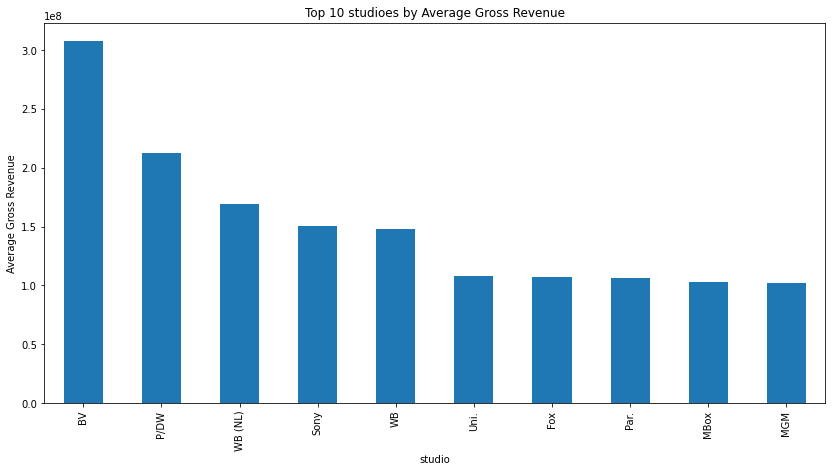

In [126]:
plt.figure(figsize=(14, 7))
top_studioes = df_cleaned.groupby('studio')['domestic_gross'].mean().nlargest(10)
top_studioes.plot(kind='bar')
plt.title('Top 10 studioes by Average Gross Revenue')
plt.xlabel('studio')
plt.ylabel('Average Gross Revenue')
plt.show()


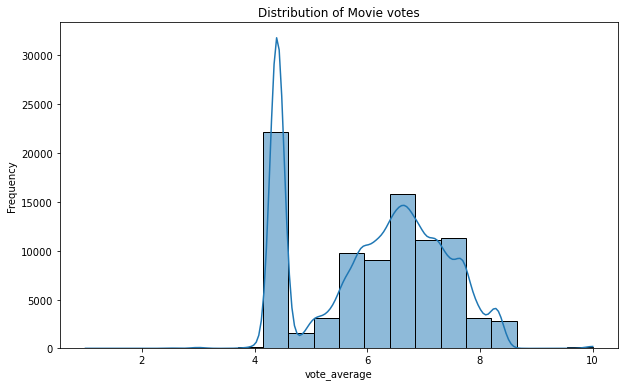

In [127]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie votes')
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.show()
